# Correlation with Memory
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/correlation_with_memory_examples.ipynb)

What does the distribution of correlations look like? Here we take a Monte Carlo approach to test the idea that transforming correlations (when the population mean correlation is zero) to a t-statistic works!

In [ ]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


#-------------------------------------------------------
# set figure defaults
linewidth_default = 3.0
fig_text_default = 18.
fig_title_default = fig_text_default*1.5

plt.rc('lines', linewidth=linewidth_default)    
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100
#mpl.rcParams['xtick.labelsize'] = fig_text_default

np.random.seed(42)

Let's start by making four really long red-noise time series with different amounts of memory. We will plot the autocorrelation functions just to get a feel for what this data looks like. "auto_vec" will be a list of the lag-1 autocorrelations we wish to use.

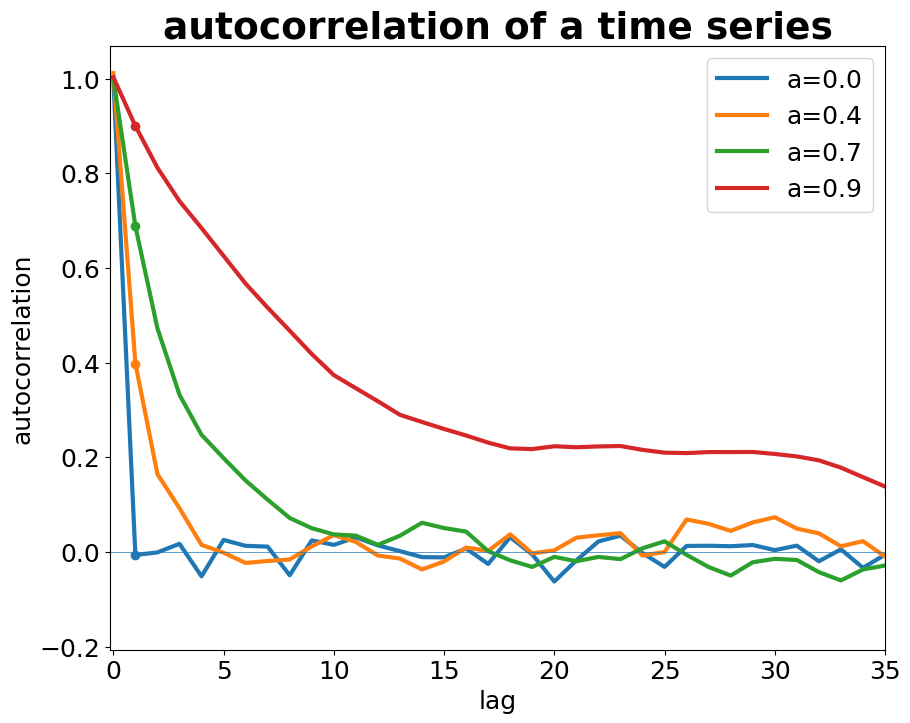

In [ ]:
auto_vec = np.array([0, .4, .7, .9])

plt.figure(figsize=(10,8))
for ia,a in enumerate(auto_vec):

    # create red-noise time series iteratively
    b = np.sqrt(1. - a**2)
#     print(a,b)
    x1 = []
    x1.append(np.random.normal(0.,1.,size=1,))
    for it in np.arange(0,1000,1):
        x1.append(a*x1[it] + b*np.random.normal(size=1))
    x1 = np.asarray(x1)[:,0]    
    
    # correlate x1 with itself to calculate the autocorrelation
    # note, can also use np.corrcoef()
    c = np.correlate(x1,x1, 'same')/(np.var(x1)*np.size(x1)) 
    c = c[int(np.size(c)/2):]    
    
    p=plt.plot(np.arange(0,np.size(c)),c,'-', label='a=' + str(a))
    clrVal = p[0].get_color()
    plt.plot(1,c[1],'o',color=clrVal)

plt.axhline(y=0,linewidth=.5)  
plt.xlim(-.15,35)
plt.xlabel('lag')
plt.ylabel('autocorrelation') 
plt.legend()
#plt.legend(np.ndarray.tolist(auto_vec))
plt.title('autocorrelation of a time series')
plt.show()

As expected, we have created four time series with the lag-1 autocorrelations we specificed in "auto_vec". 

Now, after making two red-noise time series x and y, we are going to correlate them and save this correlation in a vector called "CORR_VEC". We will create a different column in CORR_VEC for each of our four autocorrelations.

In [ ]:
CORR_VEC = np.empty((10000,np.size(auto_vec)))

for ia,a in enumerate(auto_vec):

    print('running code for a = ' + str(a))
    b = np.sqrt(1. - a**2)
    
    for ic,cval in enumerate(CORR_VEC[:,0]):
        
        x = []
        y = []
        x.append(np.random.normal(size=1))
        y.append(np.random.normal(size=1))        
        
        #make two 100-valued red noise time series with specific auto correlations; x and y are not related!
        for it in np.arange(0,100,1):
            x.append(a*x[it] + b*np.random.normal(size=1))
            y.append(a*y[it] + b*np.random.normal(size=1))
        
        x = np.asarray(x)[:,0]
        y = np.asarray(y)[:,0]            
        c = np.corrcoef(x,y)
        CORR_VEC[ic,ia] = c[0,1]

running code for a = 0.0
running code for a = 0.4
running code for a = 0.7
running code for a = 0.9


What was the point of this exercise? The point is that we want to see what the resulting distribution of correlations looks like for varying autocorrelations (memories). Let's plot the result and take a look.

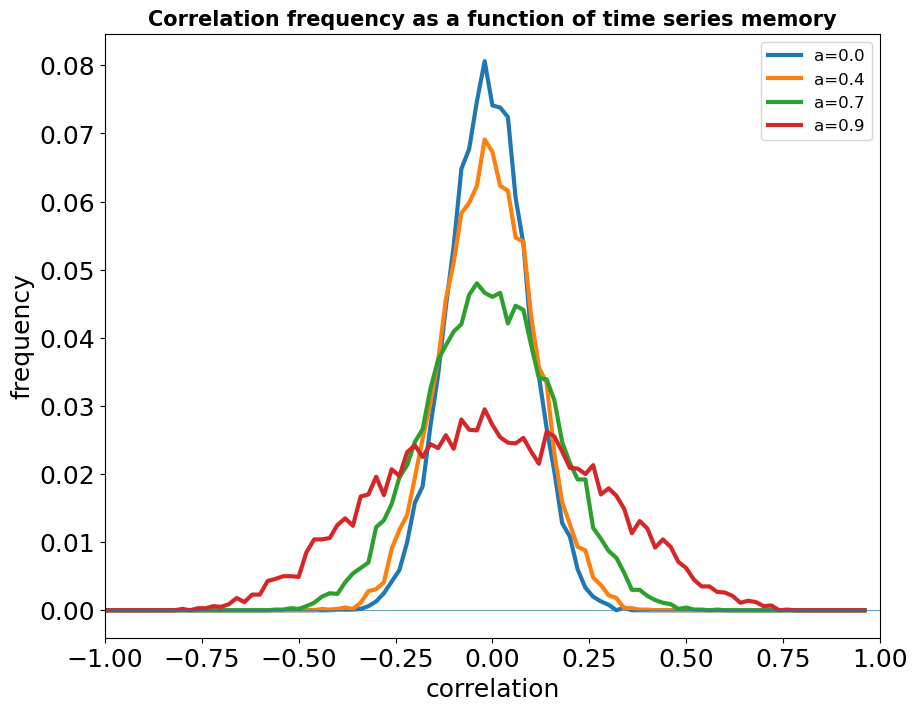

In [ ]:
xinc = np.arange(-1.,1.,0.02)

plt.figure(figsize=(10,8))

iplot = 0
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-',label='a=' + str(auto_vec[iplot]))

iplot = 1
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-',label='a=' + str(auto_vec[iplot]))

iplot = 2
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-',label='a=' + str(auto_vec[iplot]))

iplot = 3
hx = np.histogram(CORR_VEC[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(CORR_VEC,axis = 0)),'-',label='a=' + str(auto_vec[iplot]))

plt.axhline(y=0,linewidth=.5) 
plt.xlabel('correlation')
plt.ylabel('frequency')    
plt.legend(fontsize = 12)
plt.title('Correlation frequency as a function of time series memory', fontsize = 15)
plt.xlim(-1.,1.)
plt.show()

First thing to notice is that the correlations are all centered around zero. That's good - since we _know_ that x and y are not actually related to one another. The second thing to notice is that different memories in our timeseries produce different distributions! That is, if you have high memory in your data, even if the two series are actually unrelated, you could get larger correlations! This means you need to be careful, since if you think the memory is zero (blue curve) but is actually large (red curve) you might interpret a correlation of $r = 0.25$ as "special" (indicative of a true realationship) when in fact it is not.